In [41]:
!pip install nibabel
!rm -r meld_workshop
!git clone https://www.github.com/MELDproject/meld_workshop
!pip install matplotlib-surface-plotting
!pip install ipywidgets
import matplotlib_surface_plotting as msp
import numpy as np
import os
import matplotlib.pyplot as plt
import nibabel as nb



Cloning into 'meld_workshop'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 247 (delta 1), reused 2 (delta 0), pack-reused 239
Receiving objects: 100% (247/247), 170.18 MiB | 30.63 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (204/204), done.


#Load in the T1 and FLAIR MRIs

In [28]:
t1 = nb.load('./meld_workshop/data/sub_01/mri/T1.mgz')
flair = nb.load('./meld_workshop/data/sub_01/mri/FLAIR.mgz')
t1_data=t1.get_fdata()
flair_data=flair.get_fdata()

In [29]:
from ipywidgets import interact, IntSlider
def plot_slice(slice_index):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    axes[0].imshow(t1_data[:, :, slice_index].T, cmap='gray',vmin=50,vmax=120)
    axes[0].set_title(f'T1 - Slice {slice_index}')
    axes[0].axis('off')

    axes[1].imshow(flair_data[:, :, slice_index].T, cmap='gray',vmin=20,vmax=180)
    axes[1].set_title(f'FLAIR - Slice {slice_index}')
    axes[1].axis('off')

    plt.show()

# Create an interactive slider
slice_slider = IntSlider(min=0, max=t1_data.shape[2]-1, step=1, value=t1_data.shape[2]//2)

# Use the interact function to update the plot with the slider
interact(plot_slice, slice_index=slice_slider)

interactive(children=(IntSlider(value=128, description='slice_index', max=255), Output()), _dom_classes=('widg…

<function __main__.plot_slice(slice_index)>

How confident are you about the lesion location?



In [30]:
#load and view surface based features

In [58]:
features = ['thickness','w-g.pct','wm_FLAIR_0.5','pial.K_filtered.sm20']

In [59]:
surf = nb.freesurfer.read_geometry('./meld_workshop/data/fsaverage_sym/surf/lh.inflated')

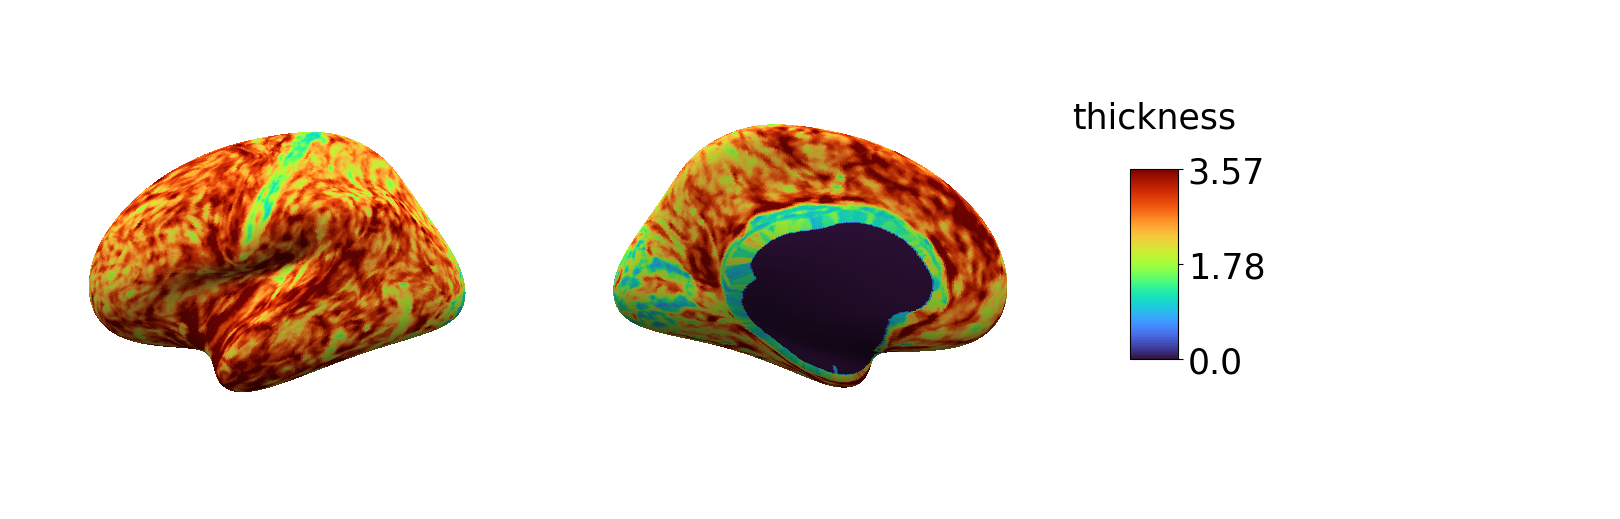

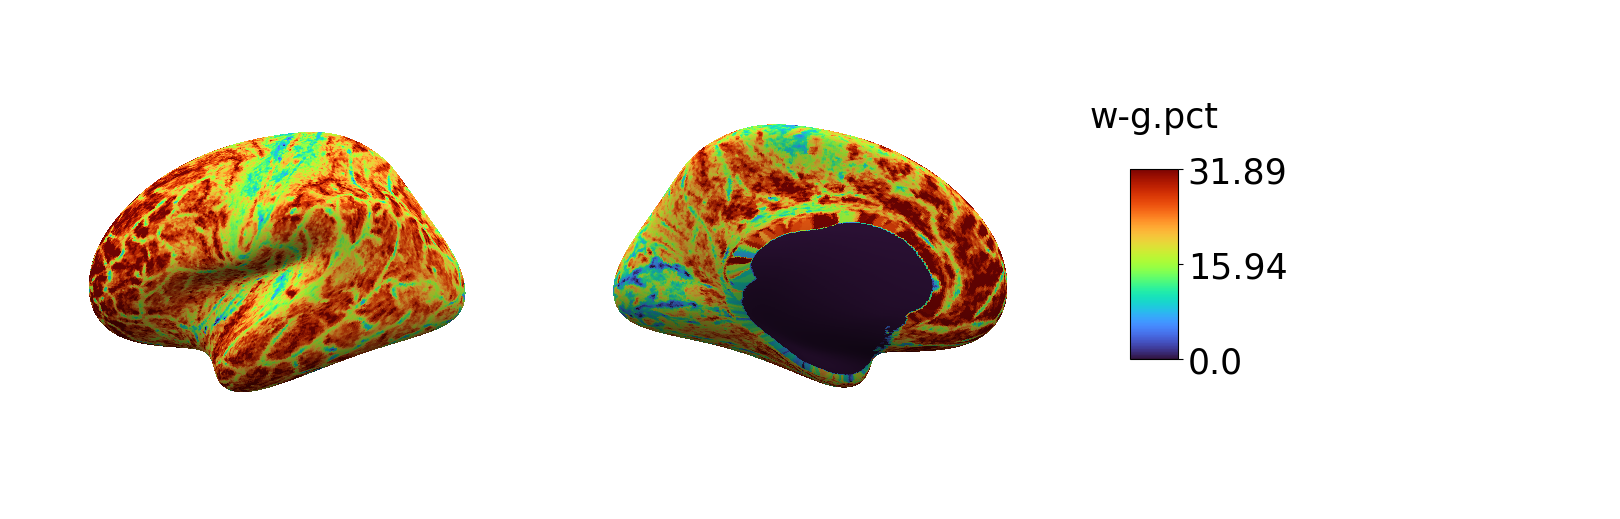

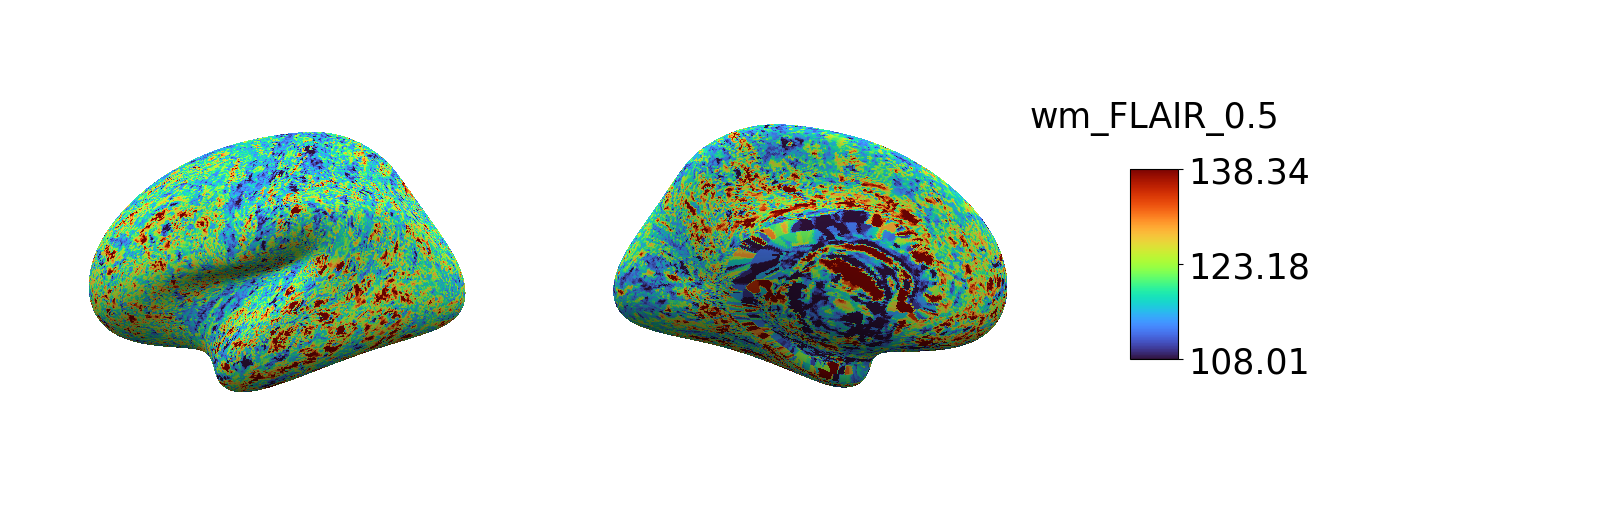

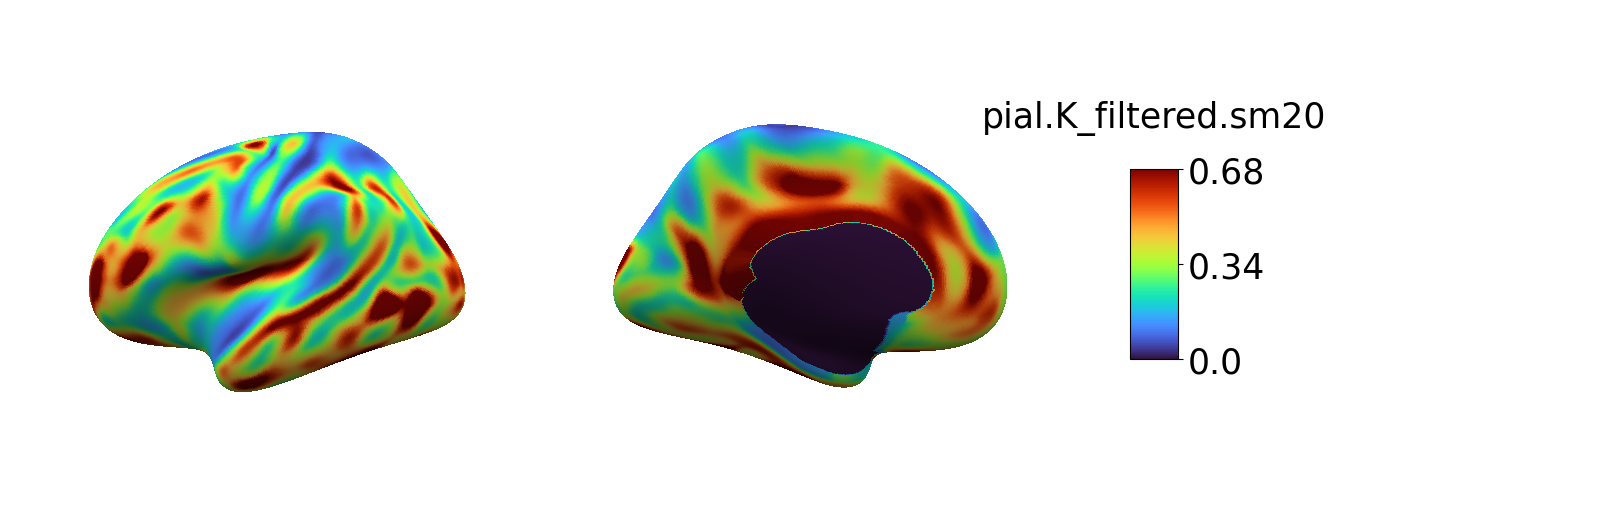

In [60]:
surf_folder = './meld_workshop/data/sub_01/xhemi/surf_meld'
hemi='rh'
for feat_i in features:
  feat = '{}.on_lh.{}.mgh'.format(hemi,feat_i)
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()

  msp.plot_surf(surf[0],surf[1],
                feature,vmin=np.percentile(feature,5),cmap_label=feat_i,
                vmax = np.percentile(feature,95),cmap='turbo')

2. How confident are you about the lesion location?




#inter & intrasubject normalisation

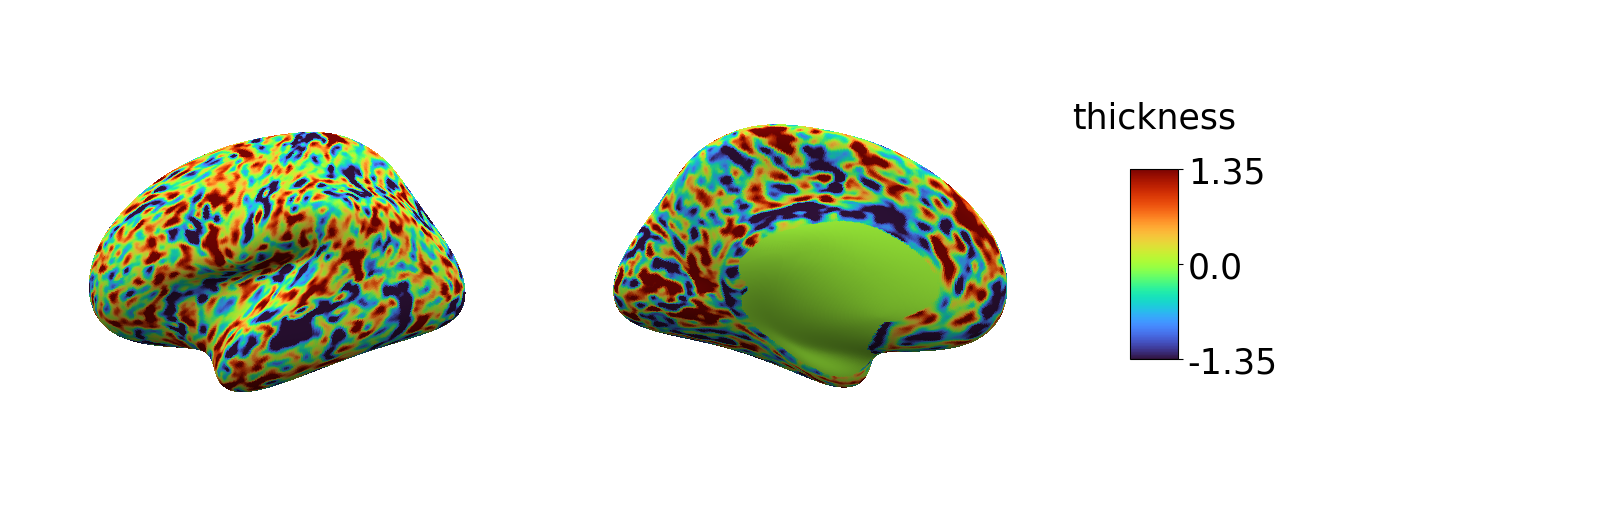

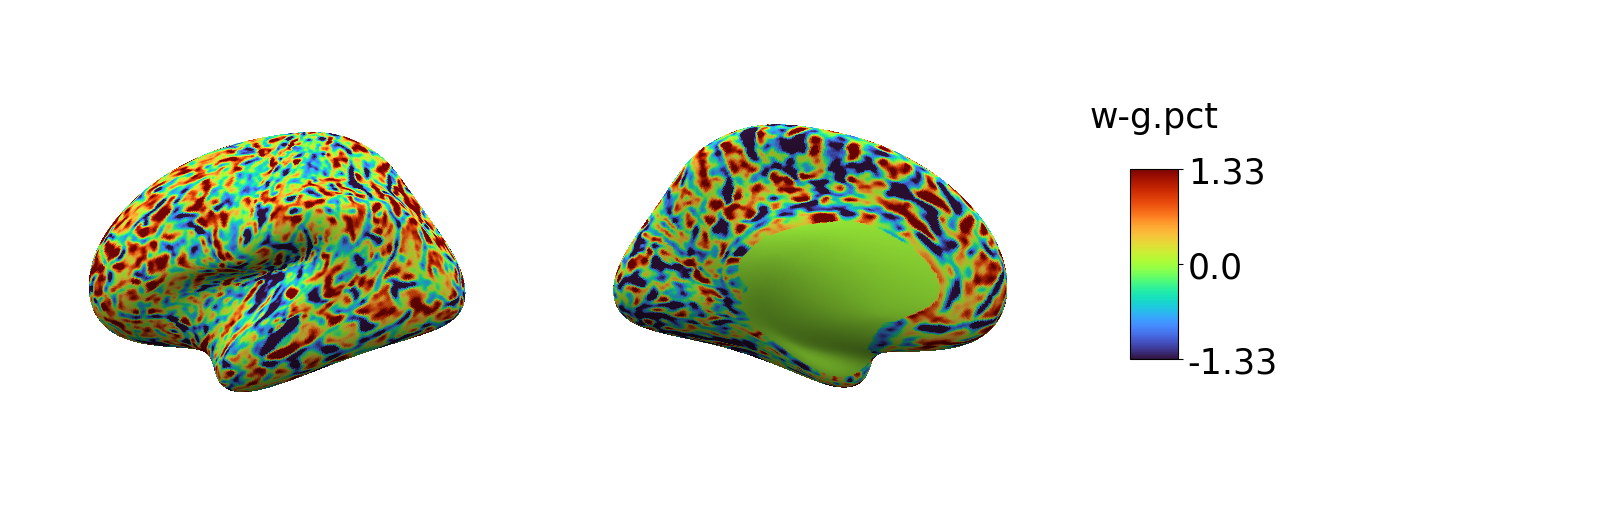

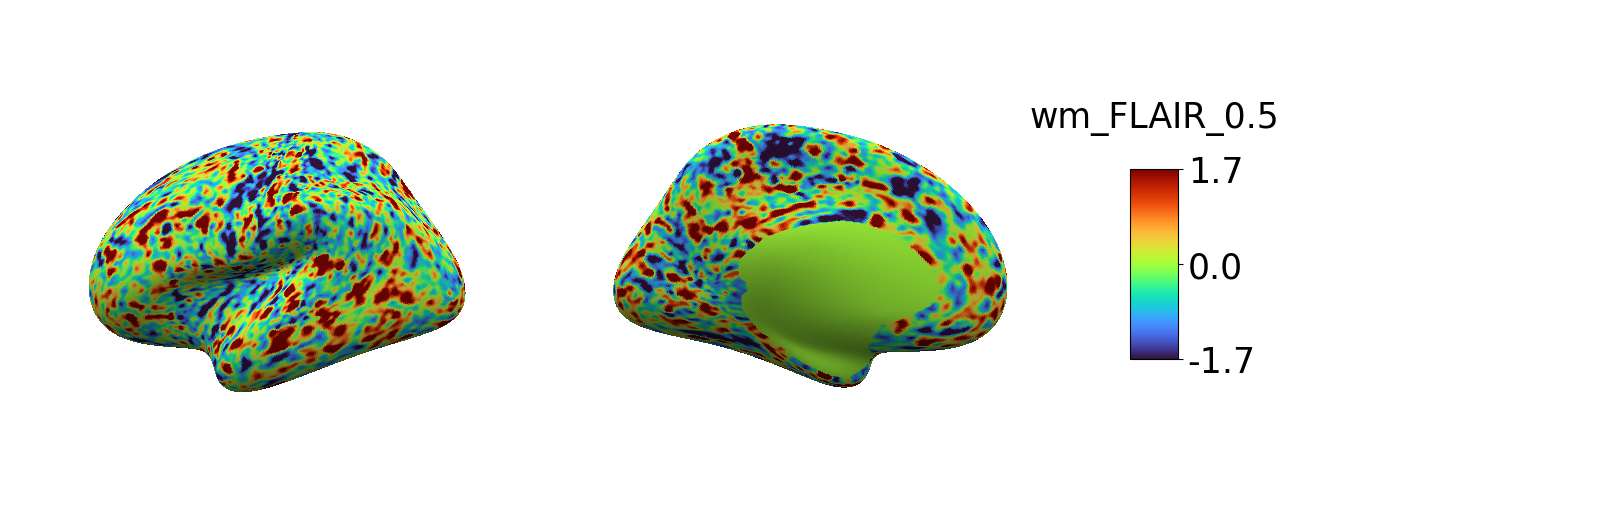

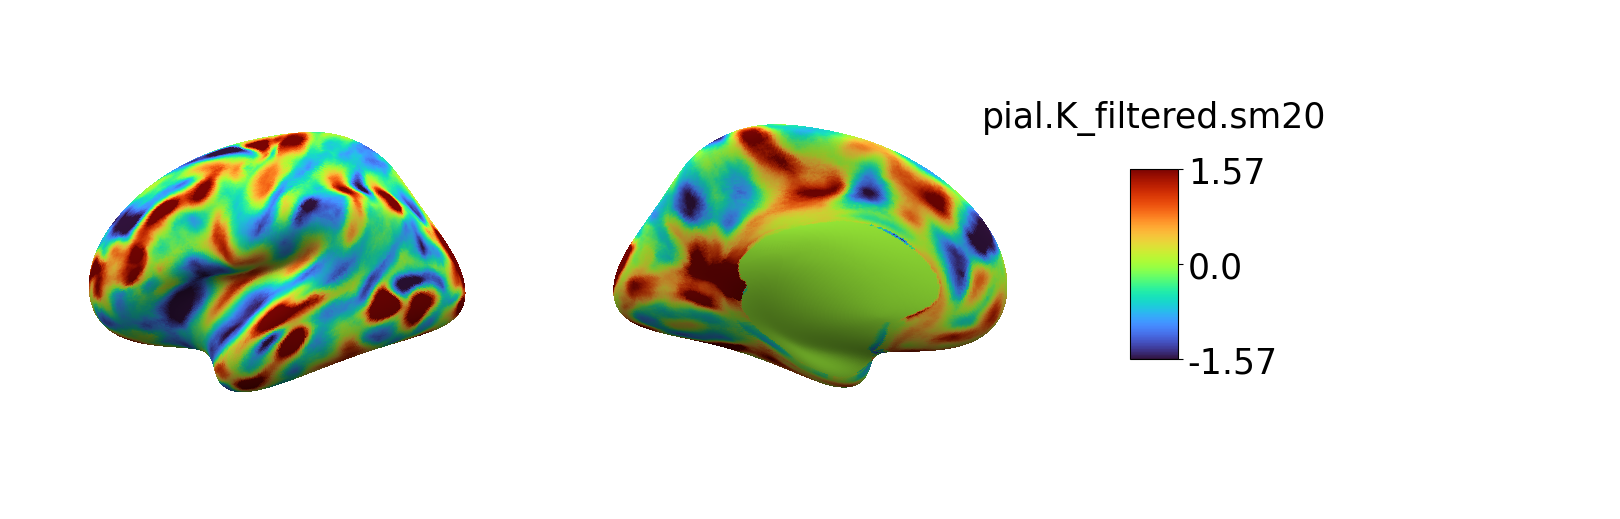

In [61]:
for feat_i in features:
  if 'pial' in feat_i:
      feat = '{}.inter_z.intra_z.combat.on_lh.{}.mgh'.format(hemi,feat_i)
  else:
      feat = '{}.inter_z.intra_z.combat.on_lh.{}.sm3.mgh'.format(hemi,feat_i)
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()

  msp.plot_surf(surf[0],surf[1],
                feature,vmin=-np.percentile(feature,95),cmap_label=feat_i,
                vmax = np.percentile(feature,95),cmap='turbo')

3. How confident are you about the lesion location?


In [62]:
#Normalised features input into graph neural network algorithm.
#Produces predictions on surface

In [63]:
feature = nb.load(os.path.join(surf_folder,
                    f'{hemi}.on_lh.prediction.mgh')).get_fdata().ravel()

In [64]:
feature.sum()

3306.0

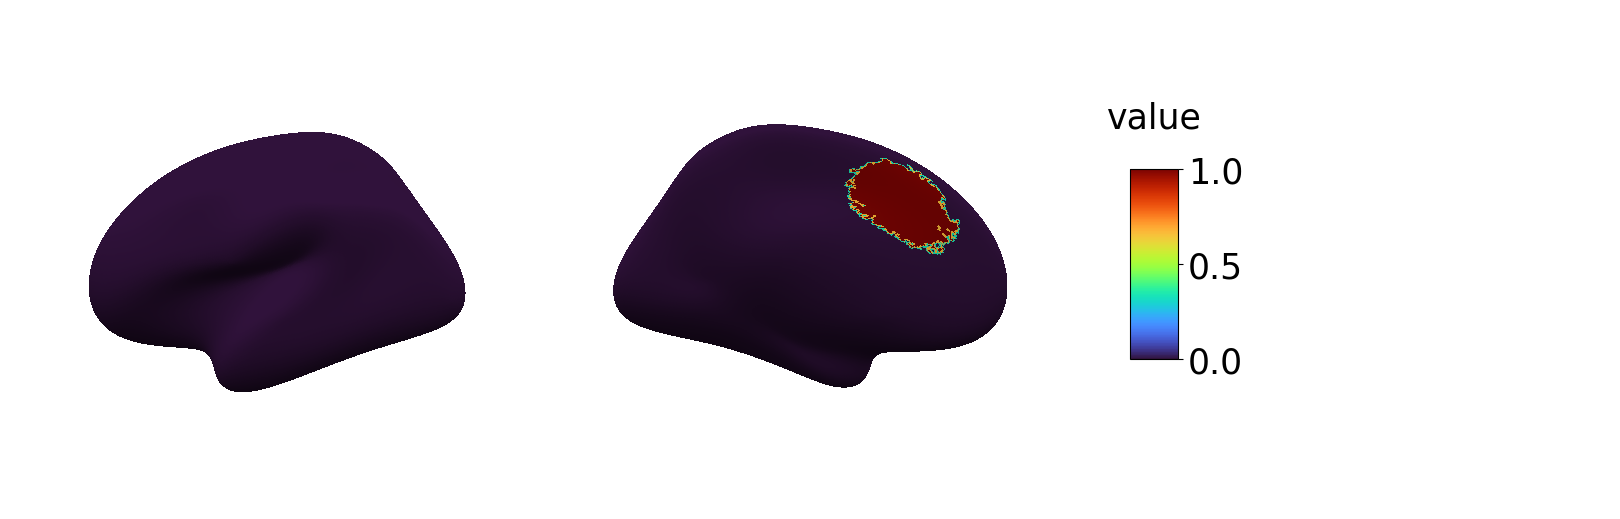

In [65]:

  msp.plot_surf(surf[0],surf[1],
                feature,cmap='turbo')